#Problem Statement

Analyze the data and generate insights that could help Netflix deciding which type of shows/movies to produce and how they can grow the business in different countries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

In [2]:
df = pd.read_csv('netflix.csv')
df.head(2)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."


In [3]:
df.describe(include='all')

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
count,8807,8807,8807,6173,7982,7976,8797,8807.000000,8803,8804,8807,8807
unique,8807,2,8807,4528,7692,748,1767,NaN,17,220,514,8775
top,s1,Movie,Dick Johnson Is Dead,Rajiv Chilaka,David Attenborough,United States,"January 1, 2020",NaN,TV-MA,1 Season,"Dramas, International Movies","Paranormal activity at a lush, abandoned prope..."
freq,1,6131,1,19,19,2818,109,NaN,3207,1793,362,4
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2014.180198,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.819312,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1925.000000,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013.000000,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017.000000,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019.000000,NaN,NaN,NaN,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [5]:
df.groupby(['type'])['rating'].value_counts()


type     rating  
Movie    TV-MA       2062
         TV-14       1427
         R            797
         TV-PG        540
         PG-13        490
         PG           287
         TV-Y7        139
         TV-Y         131
         TV-G         126
         NR            75
         G             41
         TV-Y7-FV       5
         NC-17          3
         UR             3
         66 min         1
         74 min         1
         84 min         1
TV Show  TV-MA       1145
         TV-14        733
         TV-PG        323
         TV-Y7        195
         TV-Y         176
         TV-G          94
         NR             5
         R              2
         TV-Y7-FV       1
Name: rating, dtype: int64

In [6]:
df['rating'].fillna(df['rating'].mode().values[0],inplace=True)
df['rating'].isna().sum()

0

In [7]:
df['rating'].unique()

array(['PG-13', 'TV-MA', 'PG', 'TV-14', 'TV-PG', 'TV-Y', 'TV-Y7', 'R',
       'TV-G', 'G', 'NC-17', '74 min', '84 min', '66 min', 'NR',
       'TV-Y7-FV', 'UR'], dtype=object)

In [8]:
df[df['duration'].isna()]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
5541,s5542,Movie,Louis C.K. 2017,Louis C.K.,Louis C.K.,United States,"April 4, 2017",2017,74 min,NaN,Movies,"Louis C.K. muses on religion, eternal love, gi..."
5794,s5795,Movie,Louis C.K.: Hilarious,Louis C.K.,Louis C.K.,United States,"September 16, 2016",2010,84 min,NaN,Movies,Emmy-winning comedy writer Louis C.K. brings h...
5813,s5814,Movie,Louis C.K.: Live at the Comedy Store,Louis C.K.,Louis C.K.,United States,"August 15, 2016",2015,66 min,NaN,Movies,The comic puts his trademark hilarious/thought...


In [9]:
with_rep =df[df['duration'].isna()]['rating'].values
index_rep = df[df['duration'].isna()].index
with_rep, index_rep

(array(['74 min', '84 min', '66 min'], dtype=object),
 Int64Index([5541, 5794, 5813], dtype='int64'))

In [10]:
for i in range(len(index_rep)):
    df.iloc[index_rep[i],9] = with_rep[i]
    df.iloc[index_rep[i],8] = df['rating'].mode().values[0]



In [11]:
df.iloc[index_rep]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
5541,s5542,Movie,Louis C.K. 2017,Louis C.K.,Louis C.K.,United States,"April 4, 2017",2017,TV-MA,74 min,Movies,"Louis C.K. muses on religion, eternal love, gi..."
5794,s5795,Movie,Louis C.K.: Hilarious,Louis C.K.,Louis C.K.,United States,"September 16, 2016",2010,TV-MA,84 min,Movies,Emmy-winning comedy writer Louis C.K. brings h...
5813,s5814,Movie,Louis C.K.: Live at the Comedy Store,Louis C.K.,Louis C.K.,United States,"August 15, 2016",2015,TV-MA,66 min,Movies,The comic puts his trademark hilarious/thought...


In [12]:
df['date_added']=pd.to_datetime(df['date_added'])

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       8807 non-null   object        
 1   type          8807 non-null   object        
 2   title         8807 non-null   object        
 3   director      6173 non-null   object        
 4   cast          7982 non-null   object        
 5   country       7976 non-null   object        
 6   date_added    8797 non-null   datetime64[ns]
 7   release_year  8807 non-null   int64         
 8   rating        8807 non-null   object        
 9   duration      8807 non-null   object        
 10  listed_in     8807 non-null   object        
 11  description   8807 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(10)
memory usage: 825.8+ KB


In [14]:
df_copy = df.copy()
    

In [15]:
df_part = df_copy['duration'].str.split(" ",expand=True)
df_part.columns=['duration_value','duration_format']
df_part.head()
df_copy = pd.concat([df_copy,df_part],axis=1)
df_copy.head()
df_copy.drop('duration',axis=1,inplace=True)
df_copy['duration_value'] = df_copy['duration_value'].astype(int)
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   show_id          8807 non-null   object        
 1   type             8807 non-null   object        
 2   title            8807 non-null   object        
 3   director         6173 non-null   object        
 4   cast             7982 non-null   object        
 5   country          7976 non-null   object        
 6   date_added       8797 non-null   datetime64[ns]
 7   release_year     8807 non-null   int64         
 8   rating           8807 non-null   object        
 9   listed_in        8807 non-null   object        
 10  description      8807 non-null   object        
 11  duration_value   8807 non-null   int32         
 12  duration_format  8807 non-null   object        
dtypes: datetime64[ns](1), int32(1), int64(1), object(10)
memory usage: 860.2+ KB


In [16]:
df_copy.set_index('show_id',inplace=True)
df_copy.head(1)

,type,title,director,cast,country,date_added,release_year,rating,listed_in,description,duration_value,duration_format
show_id,,,,,,,,,,,,
s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,2020,PG-13,Documentaries,"As her father nears the end of his life, filmm...",90,min


In [17]:
df['director'].unique()[:10]

array(['Kirsten Johnson', nan, 'Julien Leclercq', 'Mike Flanagan',
       'Robert Cullen, José Luis Ucha', 'Haile Gerima', 'Andy Devonshire',
       'Theodore Melfi', 'Kongkiat Komesiri', 'Christian Schwochow'],
      dtype=object)

In [18]:
"""constraint=df['cast'].apply(lambda x: str(x).split(', ')).tolist() 
df_new=pd.DataFrame(constraint,index=df['title']) 
df_new=df_new.stack() 
df_new=pd.DataFrame(df_new)
df_new.reset_index(inplace=True)
df_new=df_new[['title',0]]
df_new.columns=['title','cast']
df_new[df_new['cast']=='Rupa Bhimani']"""

"constraint=df['cast'].apply(lambda x: str(x).split(', ')).tolist() \ndf_new=pd.DataFrame(constraint,index=df['title']) \ndf_new=df_new.stack() \ndf_new=pd.DataFrame(df_new)\ndf_new.reset_index(inplace=True)\ndf_new=df_new[['title',0]]\ndf_new.columns=['title','cast']\ndf_new[df_new['cast']=='Rupa Bhimani']"

In [19]:
"""df_new.head()"""

'df_new.head()'

In [20]:
df_copy['country'].unique()[:10]

array(['United States', 'South Africa', nan, 'India',
       'United States, Ghana, Burkina Faso, United Kingdom, Germany, Ethiopia',
       'United Kingdom', 'Germany, Czech Republic', 'Mexico', 'Turkey',
       'Australia'], dtype=object)

In [21]:
"""df_copy.drop(['director_x','cast_x','country_x','listed_in_x'],axis=1,inplace=True)
df_copy.rename({'director_y':'director','cast_y':'cast','country_y':'country','listed_in_y':'alisted_in'},axis=1,inplace=True)
df_copy.head()"""

"df_copy.drop(['director_x','cast_x','country_x','listed_in_x'],axis=1,inplace=True)\ndf_copy.rename({'director_y':'director','cast_y':'cast','country_y':'country','listed_in_y':'alisted_in'},axis=1,inplace=True)\ndf_copy.head()"

In [22]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8807 entries, s1 to s8807
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   type             8807 non-null   object        
 1   title            8807 non-null   object        
 2   director         6173 non-null   object        
 3   cast             7982 non-null   object        
 4   country          7976 non-null   object        
 5   date_added       8797 non-null   datetime64[ns]
 6   release_year     8807 non-null   int64         
 7   rating           8807 non-null   object        
 8   listed_in        8807 non-null   object        
 9   description      8807 non-null   object        
 10  duration_value   8807 non-null   int32         
 11  duration_format  8807 non-null   object        
dtypes: datetime64[ns](1), int32(1), int64(1), object(9)
memory usage: 860.1+ KB


In [23]:
df_copy2 = df_copy.copy()

In [24]:
df_copy2.dropna(subset = ["director","cast","listed_in"],inplace=True)

In [25]:
df_copy2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5700 entries, s3 to s8807
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   type             5700 non-null   object        
 1   title            5700 non-null   object        
 2   director         5700 non-null   object        
 3   cast             5700 non-null   object        
 4   country          5336 non-null   object        
 5   date_added       5700 non-null   datetime64[ns]
 6   release_year     5700 non-null   int64         
 7   rating           5700 non-null   object        
 8   listed_in        5700 non-null   object        
 9   description      5700 non-null   object        
 10  duration_value   5700 non-null   int32         
 11  duration_format  5700 non-null   object        
dtypes: datetime64[ns](1), int32(1), int64(1), object(9)
memory usage: 556.6+ KB


In [26]:
df_copy2.isna().sum()

type                 0
title                0
director             0
cast                 0
country            364
date_added           0
release_year         0
rating               0
listed_in            0
description          0
duration_value       0
duration_format      0
dtype: int64

In [27]:
#def mod(x):
 #   return x['director'].mode()

In [28]:
#df_mod = df_copy2.groupby(['show_id']).apply(mod)#

In [29]:
#df_mod

In [30]:
df_copy.groupby(["show_id"])["director"].apply(lambda x: x.fillna(x.mode()))

show_id
s1       Kirsten Johnson
s2                   NaN
s3       Julien Leclercq
s4                   NaN
s5                   NaN
              ...       
s8803      David Fincher
s8804                NaN
s8805    Ruben Fleischer
s8806       Peter Hewitt
s8807        Mozez Singh
Name: director, Length: 8807, dtype: object

In [31]:
df_1 = df.copy()
df_1.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [32]:
df_copy.head()

,type,title,director,cast,country,date_added,release_year,rating,listed_in,description,duration_value,duration_format
show_id,,,,,,,,,,,,
s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,2020,PG-13,Documentaries,"As her father nears the end of his life, filmm...",90,min
s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2,Seasons
s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,2021-09-24,2021,TV-MA,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,1,Season
s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,2021-09-24,2021,TV-MA,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",1,Season
s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,2,Seasons


In [33]:
def split_list(name):
    return name.str.split(", ")

In [34]:
list_name = ["director","cast","listed_in","country"]
df_1[list_name]= df_1[list_name].apply(split_list)
df_1

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,[Kirsten Johnson],NaN,[United States],2021-09-25,2020,PG-13,90 min,[Documentaries],"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"[Ama Qamata, Khosi Ngema, Gail Mabalane, Thaba...",[South Africa],2021-09-24,2021,TV-MA,2 Seasons,"[International TV Shows, TV Dramas, TV Mysteries]","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,[Julien Leclercq],"[Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nab...",NaN,2021-09-24,2021,TV-MA,1 Season,"[Crime TV Shows, International TV Shows, TV Ac...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,2021-09-24,2021,TV-MA,1 Season,"[Docuseries, Reality TV]","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"[Mayur More, Jitendra Kumar, Ranjan Raj, Alam ...",[India],2021-09-24,2021,TV-MA,2 Seasons,"[International TV Shows, Romantic TV Shows, TV...",In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,[David Fincher],"[Mark Ruffalo, Jake Gyllenhaal, Robert Downey ...",[United States],2019-11-20,2007,R,158 min,"[Cult Movies, Dramas, Thrillers]","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,2019-07-01,2018,TV-Y7,2 Seasons,"[Kids' TV, Korean TV Shows, TV Comedies]","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,[Ruben Fleischer],"[Jesse Eisenberg, Woody Harrelson, Emma Stone,...",[United States],2019-11-01,2009,R,88 min,"[Comedies, Horror Movies]",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,[Peter Hewitt],"[Tim Allen, Courteney Cox, Chevy Chase, Kate M...",[United States],2020-01-11,2006,PG,88 min,"[Children & Family Movies, Comedies]","Dragged from civilian life, a former superhero..."


In [35]:
df_cast = df_1[["title","cast"]].explode("cast")
df_director = df_1[["title","director"]].explode("director")
df_listed_in = df_1[["title","listed_in"]].explode("listed_in")
df_country = df_1[["title","country"]].explode("country")

In [36]:
df_director

,title,director
0,Dick Johnson Is Dead,Kirsten Johnson
1,Blood & Water,NaN
2,Ganglands,Julien Leclercq
3,Jailbirds New Orleans,NaN
4,Kota Factory,NaN
...,...,...
8802,Zodiac,David Fincher
8803,Zombie Dumb,NaN
8804,Zombieland,Ruben Fleischer
8805,Zoom,Peter Hewitt


In [37]:
df_director['director'].unique()[:100]

array(['Kirsten Johnson', nan, 'Julien Leclercq', 'Mike Flanagan',
       'Robert Cullen', 'José Luis Ucha', 'Haile Gerima',
       'Andy Devonshire', 'Theodore Melfi', 'Kongkiat Komesiri',
       'Christian Schwochow', 'Bruno Garotti', 'Pedro de Echave García',
       'Pablo Azorín Williams', 'Adam Salky', 'Olivier Megaton',
       'K.S. Ravikumar', 'Alex Woo', 'Stanley Moore', 'S. Shankar',
       'Rajiv Menon', 'Dennis Dugan', 'Scott Stewart', 'Robert Luketic',
       'Ashwiny Iyer Tiwari', 'Abhishek Chaubey', 'Saket Chaudhary',
       'Daniel Sandu', 'Cédric Jimenez', 'George Nolfi',
       'Steven Spielberg', 'Jeannot Szwarc', 'Joe Alves',
       'Joseph Sargent', 'Tyler Greco', 'Daniel Espinosa',
       'Bunmi Ajakaiye', 'Antoine Fuqua', 'Toshiya Shinohara',
       'Masahiko Murata', 'Hajime Kamegaki', 'Hirotsugu Kawasaki',
       'Toshiyuki Tsuru', 'Tensai Okamura', 'David Yarovesky',
       'Hanns-Bruno Kammertöns', 'Vanessa Nöcker', 'Michael Wech',
       'David A. Vargas', 'K

In [38]:
df_merged = df_cast.merge(df_director,on="title",how="outer")
df_merged = df_merged.merge(df_listed_in,on="title",how="outer")
df_merged = df_merged.merge(df_country,on="title",how="outer")
df_merged

,title,cast,director,listed_in,country
0,Dick Johnson Is Dead,NaN,Kirsten Johnson,Documentaries,United States
1,Blood & Water,Ama Qamata,NaN,International TV Shows,South Africa
2,Blood & Water,Ama Qamata,NaN,TV Dramas,South Africa
3,Blood & Water,Ama Qamata,NaN,TV Mysteries,South Africa
4,Blood & Water,Khosi Ngema,NaN,International TV Shows,South Africa
...,...,...,...,...,...
201986,Zubaan,Anita Shabdish,Mozez Singh,International Movies,India
201987,Zubaan,Anita Shabdish,Mozez Singh,Music & Musicals,India
201988,Zubaan,Chittaranjan Tripathy,Mozez Singh,Dramas,India
201989,Zubaan,Chittaranjan Tripathy,Mozez Singh,International Movies,India


In [39]:
df_1.drop(columns=["director","cast","listed_in","country","description"],inplace=True)
df_1.head()

,show_id,type,title,date_added,release_year,rating,duration
0,s1,Movie,Dick Johnson Is Dead,2021-09-25,2020,PG-13,90 min
1,s2,TV Show,Blood & Water,2021-09-24,2021,TV-MA,2 Seasons
2,s3,TV Show,Ganglands,2021-09-24,2021,TV-MA,1 Season
3,s4,TV Show,Jailbirds New Orleans,2021-09-24,2021,TV-MA,1 Season
4,s5,TV Show,Kota Factory,2021-09-24,2021,TV-MA,2 Seasons


In [40]:
df_1 = df_merged.merge(df_1,on="title",how="left")
df_1

,title,cast,director,listed_in,country,show_id,type,date_added,release_year,rating,duration
0,Dick Johnson Is Dead,NaN,Kirsten Johnson,Documentaries,United States,s1,Movie,2021-09-25,2020,PG-13,90 min
1,Blood & Water,Ama Qamata,NaN,International TV Shows,South Africa,s2,TV Show,2021-09-24,2021,TV-MA,2 Seasons
2,Blood & Water,Ama Qamata,NaN,TV Dramas,South Africa,s2,TV Show,2021-09-24,2021,TV-MA,2 Seasons
3,Blood & Water,Ama Qamata,NaN,TV Mysteries,South Africa,s2,TV Show,2021-09-24,2021,TV-MA,2 Seasons
4,Blood & Water,Khosi Ngema,NaN,International TV Shows,South Africa,s2,TV Show,2021-09-24,2021,TV-MA,2 Seasons
...,...,...,...,...,...,...,...,...,...,...,...
201986,Zubaan,Anita Shabdish,Mozez Singh,International Movies,India,s8807,Movie,2019-03-02,2015,TV-14,111 min
201987,Zubaan,Anita Shabdish,Mozez Singh,Music & Musicals,India,s8807,Movie,2019-03-02,2015,TV-14,111 min
201988,Zubaan,Chittaranjan Tripathy,Mozez Singh,Dramas,India,s8807,Movie,2019-03-02,2015,TV-14,111 min
201989,Zubaan,Chittaranjan Tripathy,Mozez Singh,International Movies,India,s8807,Movie,2019-03-02,2015,TV-14,111 min


In [41]:
df_1['title'].nunique()

8807

In [42]:
df_1.loc[df_1['country'].isna()]

,title,cast,director,listed_in,country,show_id,type,date_added,release_year,rating,duration
58,Ganglands,Sami Bouajila,Julien Leclercq,Crime TV Shows,NaN,s3,TV Show,2021-09-24,2021,TV-MA,1 Season
59,Ganglands,Sami Bouajila,Julien Leclercq,International TV Shows,NaN,s3,TV Show,2021-09-24,2021,TV-MA,1 Season
60,Ganglands,Sami Bouajila,Julien Leclercq,TV Action & Adventure,NaN,s3,TV Show,2021-09-24,2021,TV-MA,1 Season
61,Ganglands,Tracy Gotoas,Julien Leclercq,Crime TV Shows,NaN,s3,TV Show,2021-09-24,2021,TV-MA,1 Season
62,Ganglands,Tracy Gotoas,Julien Leclercq,International TV Shows,NaN,s3,TV Show,2021-09-24,2021,TV-MA,1 Season
...,...,...,...,...,...,...,...,...,...,...,...
201424,YOM,Mayur Vyas,NaN,Kids' TV,NaN,s8786,TV Show,2018-06-07,2016,TV-Y7,1 Season
201425,YOM,Ketan Kava,NaN,Kids' TV,NaN,s8786,TV Show,2018-06-07,2016,TV-Y7,1 Season
201932,Zombie Dumb,NaN,NaN,Kids' TV,NaN,s8804,TV Show,2019-07-01,2018,TV-Y7,2 Seasons
201933,Zombie Dumb,NaN,NaN,Korean TV Shows,NaN,s8804,TV Show,2019-07-01,2018,TV-Y7,2 Seasons


In [43]:
df_1.isna().sum()

title               0
cast             2146
director        50643
listed_in           0
country         11897
show_id             0
type                0
date_added        158
release_year        0
rating              0
duration            0
dtype: int64

In [44]:
df_1["country"] = df_1.groupby(["listed_in","type"])["country"].apply(lambda x: x.fillna(x.mode().iloc[0]))

In [45]:
df_1.iloc[58]

title                     Ganglands
cast                  Sami Bouajila
director            Julien Leclercq
listed_in            Crime TV Shows
country               United States
show_id                          s3
type                        TV Show
date_added      2021-09-24 00:00:00
release_year                   2021
rating                        TV-MA
duration                   1 Season
Name: 58, dtype: object

In [46]:
df_1["director"] = df_1.groupby(["listed_in",'type'])["director"].apply(lambda x: x.fillna(x.mode().iloc[0]))

In [47]:
df_1["cast"] = df_1.groupby(["listed_in","type"])["cast"].apply(lambda x: x.fillna(x.mode().iloc[0]))

In [48]:
df_1["date_added"] = df_1.groupby(['release_year','type'])["date_added"].apply(lambda x: x.fillna(x.mode().iloc[0]))

In [49]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 201991 entries, 0 to 201990
Data columns (total 11 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   title         201991 non-null  object        
 1   cast          201991 non-null  object        
 2   director      201991 non-null  object        
 3   listed_in     201991 non-null  object        
 4   country       201991 non-null  object        
 5   show_id       201991 non-null  object        
 6   type          201991 non-null  object        
 7   date_added    201991 non-null  datetime64[ns]
 8   release_year  201991 non-null  int64         
 9   rating        201991 non-null  object        
 10  duration      201991 non-null  object        
dtypes: datetime64[ns](1), int64(1), object(9)
memory usage: 18.5+ MB


In [50]:
df_part = df_1['duration'].str.split(" ",expand=True)
df_part.columns=['duration_value','duration_format']

df_1 = pd.concat([df_1,df_part],axis=1)

df_1.drop('duration',axis=1,inplace=True)
df_1['duration_value'] = df_1['duration_value'].astype(int)
df_1.head()

,title,cast,director,listed_in,country,show_id,type,date_added,release_year,rating,duration_value,duration_format
0,Dick Johnson Is Dead,Samuel West,Kirsten Johnson,Documentaries,United States,s1,Movie,2021-09-25,2020,PG-13,90,min
1,Blood & Water,Ama Qamata,Noam Murro,International TV Shows,South Africa,s2,TV Show,2021-09-24,2021,TV-MA,2,Seasons
2,Blood & Water,Ama Qamata,Alan Poul,TV Dramas,South Africa,s2,TV Show,2021-09-24,2021,TV-MA,2,Seasons
3,Blood & Water,Ama Qamata,Rob Seidenglanz,TV Mysteries,South Africa,s2,TV Show,2021-09-24,2021,TV-MA,2,Seasons
4,Blood & Water,Khosi Ngema,Noam Murro,International TV Shows,South Africa,s2,TV Show,2021-09-24,2021,TV-MA,2,Seasons


In [51]:
df_1.duplicated().sum()

55

In [52]:
df_1.drop_duplicates(inplace=True)
df_1.duplicated().sum()

0

In [53]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 201936 entries, 0 to 201990
Data columns (total 12 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   title            201936 non-null  object        
 1   cast             201936 non-null  object        
 2   director         201936 non-null  object        
 3   listed_in        201936 non-null  object        
 4   country          201936 non-null  object        
 5   show_id          201936 non-null  object        
 6   type             201936 non-null  object        
 7   date_added       201936 non-null  datetime64[ns]
 8   release_year     201936 non-null  int64         
 9   rating           201936 non-null  object        
 10  duration_value   201936 non-null  int32         
 11  duration_format  201936 non-null  object        
dtypes: datetime64[ns](1), int32(1), int64(1), object(9)
memory usage: 19.3+ MB


#Insights

Total number of rows in dataset are 201936 and columns are 12 where date_added column is of datetime datatype, release_year and duration_value are of integer datatype and rest of the column are categorical type containing non-null values

In [54]:
df_1.describe(include='all',datetime_is_numeric=True)

,title,cast,director,listed_in,country,show_id,type,date_added,release_year,rating,duration_value,duration_format
count,201936,201936,201936,201936,201936,201936,201936,201936,201936.000000,201936,201936.000000,201936
unique,8807,36439,4993,42,127,8807,2,NaN,NaN,14,NaN,3
top,Kahlil Gibran's The Prophet,Samuel West,Noam Murro,Dramas,United States,s7165,Movie,NaN,NaN,TV-MA,NaN,min
freq,700,734,12860,29756,66770,700,145788,NaN,NaN,73889,NaN,145788
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-06-18 18:15:42.571904,2013.452277,NaN,77.679750,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2008-01-01 00:00:00,1925.000000,NaN,1.000000,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018-06-22 00:00:00,2012.000000,NaN,4.000000,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-09-01 00:00:00,2016.000000,NaN,95.000000,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-09-10 00:00:00,2019.000000,NaN,112.000000,NaN
max,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021-09-25 00:00:00,2021.000000,NaN,312.000000,NaN


#Insights
1. Total number of unique titles in dataset are 8807 in which about 700 rows belong to title Kahlil Gibran's The Prophet
2. Total number of unique actors/actresses are 36439 in which top actor is Samuel West who has been part of cast in 734 rows
3. Total number of unique directors are 4993 in which top director is Noam Murro who has been part of directors in 12860 rows
4. Total number of unique listed_in are 42 in which top category is Dramas who has been part of 29756 rows
5. Total number of unique countries are 127 in which top country is United States who has been part of 66770 rows
6. Total number of unique type are 2 in which top type is Movie who has been part of 145788 rows
7. Mean date of all titles were added on netflix is 18th June 2019, Min date means date on which first title was uploaded on netflix was 1st Jan 2008, Max date means latest date on which title was added on netflix was 25th Sep 2021, 75 percent titles were added till 10th Sep 2020, 50 percent titles were added till 1st Sep 2019, 25 percent titles were added till 22nd June 2018. This Shows the range of date_added for titles uploaded on netflix is [1-1-2008,25-9-2021] 
8. Mean year of all titles were released is 2013, Min year means year on which first title was released was 1925, Max year means latest year on which title was released was 2021, 75 percent titles were released till 2019, 50 percent titles were released till 2016, 25 percent titles were released till 2012, standard deviation between release_year is 9.003761. This shows the range of release_year of titles that are available on netfix is [1925,2021]
9. Total number of unique ratings in dataset are 14 in which about top rating is 'TV-MA' which is part of 73889 rows 
10. Mean duration_value of all titles was counted 77, Min duration_value is 1, Max duration_value is 312, 75 percent titles duration_value is 112, 50 percent titles duration_value is 95, 25 percent titles duration_value is 4, standard deviation between duration_value is 51.492088. This shows the range of duration_value of titles that are available on netfix is [1,312]
11. Total number of unique duration_format are 3 but it is actually 2 as there are two version of season(season,seasons) in dataset in which top duration_format is min which is part of 145788 rows 


In [55]:
df_1['title'].unique()

array(['Dick Johnson Is Dead', 'Blood & Water', 'Ganglands', ...,
       'Zombieland', 'Zoom', 'Zubaan'], dtype=object)

In [56]:
df_1['title'].value_counts()

Kahlil Gibran's The Prophet    700
Holidays                       504
Movie 43                       468
The Eddy                       416
Narcos                         378
                              ... 
Thackeray                        1
The 2000s                        1
Miniforce: Super Dino Power      1
Dancing with the Birds           1
Dick Johnson Is Dead             1
Name: title, Length: 8807, dtype: int64

In [57]:
df_1.loc[df_1['title']=="Kahlil Gibran's The Prophet"]

,title,cast,director,listed_in,country,show_id,type,date_added,release_year,rating,duration_value,duration_format
162810,Kahlil Gibran's The Prophet,Liam Neeson,Roger Allers,Children & Family Movies,United States,s7165,Movie,2017-10-01,2014,PG,85,min
162811,Kahlil Gibran's The Prophet,Liam Neeson,Roger Allers,Children & Family Movies,France,s7165,Movie,2017-10-01,2014,PG,85,min
162812,Kahlil Gibran's The Prophet,Liam Neeson,Roger Allers,Children & Family Movies,Canada,s7165,Movie,2017-10-01,2014,PG,85,min
162813,Kahlil Gibran's The Prophet,Liam Neeson,Roger Allers,Children & Family Movies,Lebanon,s7165,Movie,2017-10-01,2014,PG,85,min
162814,Kahlil Gibran's The Prophet,Liam Neeson,Roger Allers,Children & Family Movies,Qatar,s7165,Movie,2017-10-01,2014,PG,85,min
...,...,...,...,...,...,...,...,...,...,...,...,...
163505,Kahlil Gibran's The Prophet,Quvenzhané Wallis,Michael Socha,Dramas,United States,s7165,Movie,2017-10-01,2014,PG,85,min
163506,Kahlil Gibran's The Prophet,Quvenzhané Wallis,Michael Socha,Dramas,France,s7165,Movie,2017-10-01,2014,PG,85,min
163507,Kahlil Gibran's The Prophet,Quvenzhané Wallis,Michael Socha,Dramas,Canada,s7165,Movie,2017-10-01,2014,PG,85,min
163508,Kahlil Gibran's The Prophet,Quvenzhané Wallis,Michael Socha,Dramas,Lebanon,s7165,Movie,2017-10-01,2014,PG,85,min


In [58]:
No_of_cast_in_title = df_1.groupby(['title'])[['cast']].nunique().reset_index()
No_of_cast_in_title.rename({'cast':'No. of cast'},axis=1,inplace=True)
No_of_cast_in_title.sort_values(by=['No. of cast'],ascending=False)

,title,No. of cast
6417,Social Distance,50
1056,Black Mirror,50
3007,Heartbreak High,47
1724,Creeped Out,47
1292,COMEDIANS of the world,47
...,...,...
5302,"Out of Many, One",1
5297,Our Planet - Behind The Scenes,1
2983,Have You Seen the Listers?,1
5296,Our Planet,1


#Insight

from here we get the total number of unique cast per title in which there are two title ['Social Distance','Black Mirror'] where number of cast is max which is 50 and there are many titles with minimum number of cast which is 1

In [60]:
df_1['cast'].nunique()

36439

In [61]:
No_of_Title_per_cast = df_1['cast'].value_counts()
No_of_Title_per_cast

Samuel West           734
David Attenborough    464
Anupam Kher           461
Takahiro Sakurai      211
John Krasinski        182
                     ... 
Boulet Brothers         1
Dario Yazbek            1
Corinne Foxx            1
Jacob Craner            1
Wendy McColm            1
Name: cast, Length: 36439, dtype: int64

In [62]:
df_1['director'].unique()

array(['Kirsten Johnson', 'Noam Murro', 'Alan Poul', ...,
       'Majid Al Ansari', 'Peter Hewitt', 'Mozez Singh'], dtype=object)

In [63]:
df_1['director'].value_counts()

Noam Murro            12860
Alan Poul              7831
Thomas Astruc          6558
Alejandro Lozano       6088
Guy Vasilovich         4592
                      ...  
Zackary Canepari          1
Kiki Goshay               1
Jacqueline Monetta        1
Caio Cobra                1
Kirsten Johnson           1
Name: director, Length: 4993, dtype: int64

In [64]:
df_1['listed_in'].unique()

array(['Documentaries', 'International TV Shows', 'TV Dramas',
       'TV Mysteries', 'Crime TV Shows', 'TV Action & Adventure',
       'Docuseries', 'Reality TV', 'Romantic TV Shows', 'TV Comedies',
       'TV Horror', 'Children & Family Movies', 'Dramas',
       'Independent Movies', 'International Movies', 'British TV Shows',
       'Comedies', 'Spanish-Language TV Shows', 'Thrillers',
       'Romantic Movies', 'Music & Musicals', 'Horror Movies',
       'Sci-Fi & Fantasy', 'TV Thrillers', "Kids' TV",
       'Action & Adventure', 'TV Sci-Fi & Fantasy', 'Classic Movies',
       'Anime Features', 'Sports Movies', 'Anime Series',
       'Korean TV Shows', 'Science & Nature TV', 'Teen TV Shows',
       'Cult Movies', 'TV Shows', 'Faith & Spirituality', 'LGBTQ Movies',
       'Stand-Up Comedy', 'Movies', 'Stand-Up Comedy & Talk Shows',
       'Classic & Cult TV'], dtype=object)

In [65]:
df_1['listed_in'].value_counts()

Dramas                          29756
International Movies            28192
Comedies                        20829
International TV Shows          12845
Action & Adventure              12216
Independent Movies               9818
Children & Family Movies         9771
TV Dramas                        8942
Thrillers                        7106
Romantic Movies                  6412
TV Comedies                      4963
Crime TV Shows                   4733
Horror Movies                    4571
Kids' TV                         4568
Sci-Fi & Fantasy                 4037
Music & Musicals                 3077
Romantic TV Shows                3049
Documentaries                    2407
Anime Series                     2313
TV Action & Adventure            2288
Spanish-Language TV Shows        2126
British TV Shows                 1808
Sports Movies                    1531
Classic Movies                   1434
TV Mysteries                     1281
Korean TV Shows                  1122
Cult Movies 

In [66]:
df_1['country'].unique()

array(['United States', 'South Africa', 'Japan', 'India', 'Ghana',
       'Burkina Faso', 'United Kingdom', 'Germany', 'Ethiopia',
       'Czech Republic', 'Mexico', 'Turkey', 'Australia', 'France',
       'Finland', 'China', 'Canada', 'South Korea', 'Nigeria', 'Spain',
       'Belgium', 'Singapore', 'Italy', 'Romania', 'Argentina',
       'Venezuela', 'Hong Kong', 'Russia', '', 'Ireland', 'Nepal',
       'New Zealand', 'Brazil', 'Greece', 'Jordan', 'Colombia',
       'Switzerland', 'Israel', 'Taiwan', 'Bulgaria', 'Algeria', 'Poland',
       'Saudi Arabia', 'Thailand', 'Indonesia', 'Egypt', 'Denmark',
       'Kuwait', 'Netherlands', 'Malaysia', 'Vietnam', 'Hungary',
       'Sweden', 'Lebanon', 'Syria', 'Philippines', 'Iceland',
       'United Arab Emirates', 'Norway', 'Qatar', 'Mauritius', 'Austria',
       'Cameroon', 'Palestine', 'Uruguay', 'United Kingdom,', 'Kenya',
       'Chile', 'Luxembourg', 'Cambodia', 'Bangladesh', 'Portugal',
       'Cayman Islands', 'Senegal', 'Serbia', 'Ma

In [67]:
df_1["country"] = df_1.groupby(["type","rating",'listed_in'])["country"].apply(lambda x: x.replace({'':x.mode().iloc[0]}))

In [68]:
df_1['country'].value_counts()

United States     66774
India             24479
United Kingdom    12977
Japan             10668
France             8252
                  ...  
Mongolia              2
Kazakhstan            1
Nicaragua             1
Uganda                1
United States,        1
Name: country, Length: 126, dtype: int64

In [69]:
df_1['type'].unique()

array(['Movie', 'TV Show'], dtype=object)

In [70]:
df_1['type'].value_counts()

Movie      145788
TV Show     56148
Name: type, dtype: int64

In [71]:
df_1['date_added'].unique()

array(['2021-09-25T00:00:00.000000000', '2021-09-24T00:00:00.000000000',
       '2021-09-23T00:00:00.000000000', ...,
       '2018-12-06T00:00:00.000000000', '2016-03-09T00:00:00.000000000',
       '2020-01-11T00:00:00.000000000'], dtype='datetime64[ns]')

In [72]:
df_1['date_added'].dt.date.value_counts()

2020-01-01    3748
2019-11-01    2258
2021-07-01    2219
2017-10-01    1899
2021-09-01    1756
              ... 
2015-12-18       1
2017-06-27       1
2020-05-26       1
2016-08-02       1
2021-09-25       1
Name: date_added, Length: 1714, dtype: int64

In [73]:
df_1['release_year'].unique()

array([2020, 2021, 1993, 2018, 1996, 1998, 1997, 2010, 2013, 2017, 1975,
       1978, 1983, 1987, 2012, 2001, 2014, 2002, 2003, 2004, 2011, 2008,
       2009, 2007, 2005, 2006, 1994, 2015, 2019, 2016, 1982, 1989, 1990,
       1991, 1999, 1986, 1992, 1984, 1980, 1961, 2000, 1995, 1985, 1976,
       1959, 1988, 1981, 1972, 1964, 1945, 1954, 1979, 1958, 1956, 1963,
       1970, 1973, 1925, 1974, 1960, 1966, 1971, 1962, 1969, 1977, 1967,
       1968, 1965, 1946, 1942, 1955, 1944, 1947, 1943], dtype=int64)

In [74]:
df_1['release_year'].value_counts()

2018    24413
2019    21883
2017    20516
2020    19679
2016    18465
        ...  
1947        8
1946        6
1942        6
1943        5
1925        1
Name: release_year, Length: 74, dtype: int64

In [75]:
df_1['rating'].unique()

array(['PG-13', 'TV-MA', 'PG', 'TV-14', 'TV-PG', 'TV-Y', 'TV-Y7', 'R',
       'TV-G', 'G', 'NC-17', 'NR', 'TV-Y7-FV', 'UR'], dtype=object)

In [76]:
df_1['rating'].value_counts()

TV-MA       73889
TV-14       43925
R           25859
PG-13       16246
TV-PG       14926
PG          10919
TV-Y7        6304
TV-Y         3665
TV-G         2779
NR           1573
G            1530
NC-17         149
TV-Y7-FV       86
UR             86
Name: rating, dtype: int64

In [77]:
df_1['duration_value'].unique()

array([ 90,   2,   1,  91, 125,   9, 104, 127,   4,  67,  94,   5, 161,
        61, 166, 147, 103,  97, 106, 111,   3, 110, 105,  96, 124, 116,
        98,  23, 115, 122,  99,  88, 100,   6, 102,  93,  95,  85,  83,
       113,  13, 182,  48, 145,  87,  92,  80, 117, 128, 119, 143, 114,
       118, 108,  63, 121, 142, 154, 120,  82, 109, 101,  86, 229,  76,
        89, 156, 112, 107, 129, 135, 136, 165, 150, 133,  70,  84, 140,
        78,   7,  64,  59, 139,  69, 148, 189, 141, 130, 138,  81, 132,
        10, 123,  65,  68,  66,  62,  74, 131,  39,  46,  38,   8,  17,
       126, 155, 159, 137,  12, 273,  36,  34,  77,  60,  49,  58,  72,
       204, 212,  25,  73,  29,  47,  32,  35,  71, 149,  33,  15,  54,
       224, 162,  37,  75,  79,  55, 158, 164, 173, 181, 185,  21,  24,
        51, 151,  42,  22, 134, 177,  52,  14,  53,  57,  28,  50,  26,
        45, 171,  27,  44, 146,  20, 157, 203,  41,  30, 194, 233, 237,
       230, 195, 253, 152, 190, 160, 208, 180, 144, 174, 170, 19

In [78]:
df_1['duration_value'].value_counts()

1      35035
2       9559
3       5088
94      4343
106     4040
       ...  
39         5
16         4
196        4
20         4
18         4
Name: duration_value, Length: 210, dtype: int64

In [79]:
df_1['duration_format'].unique()

array(['min', 'Seasons', 'Season'], dtype=object)

In [80]:
df_1.replace({'Seasons':'Season'},inplace=True)

In [81]:
df_1['duration_format'].value_counts()

min       145788
Season     56148
Name: duration_format, dtype: int64

In [82]:
type_of_content_in_countries={}
countries = df_1.groupby(['country'])['listed_in'].unique().index
content_type = df_1.groupby(['country'])['listed_in'].unique().values

for i in range(len(countries)):
    type_of_content_in_countries[countries[i]] = content_type[i]

type_of_content_in_countries

{'Afghanistan': array(['Documentaries', 'International Movies'], dtype=object),
 'Albania': array(['Dramas', 'International Movies'], dtype=object),
 'Algeria': array(['Dramas', 'Independent Movies', 'International Movies',
        'Classic Movies'], dtype=object),
 'Angola': array(['Action & Adventure', 'International Movies'], dtype=object),
 'Argentina': array(['Dramas', 'International Movies', 'Thrillers', 'Crime TV Shows',
        'International TV Shows', 'Spanish-Language TV Shows', 'Comedies',
        'Cult Movies', 'Classic Movies', 'Classic & Cult TV', 'Reality TV',
        'Romantic TV Shows', 'Documentaries', 'Stand-Up Comedy',
        'Independent Movies', 'LGBTQ Movies', 'Docuseries',
        'Sports Movies', 'Music & Musicals', 'Children & Family Movies',
        'TV Comedies', 'TV Dramas', "Kids' TV", 'Teen TV Shows',
        'Action & Adventure', 'TV Horror', 'Movies', 'Romantic Movies',
        'Horror Movies', 'Sci-Fi & Fantasy'], dtype=object),
 'Armenia': array(['D

#Insight

here we can see that what type of content are available in various countries on netflix like take example of Afghanistan it has content of listed_in types Documentaries and International Movies.

#Recommendation

we could recommend the decision making stakeholders to increase the type of listed_in contents as to increase user's traffic and attention as they would have large variety of shows which could include their favourites so, they can also recommend to their relatives to join netflix

In [83]:
per_year_movie = df_1.loc[df_1['type']=='Movie'].groupby(['release_year'])[['title']].nunique().reset_index()
n = per_year_movie.loc[per_year_movie['release_year'].isin(np.arange(1991,2022))]
year, movies_count = n['release_year'].values, n['title'].values
n

,release_year,title
42,1991,16
43,1992,20
44,1993,24
45,1994,20
46,1995,23
47,1996,21
48,1997,34
49,1998,32
50,1999,32
51,2000,33


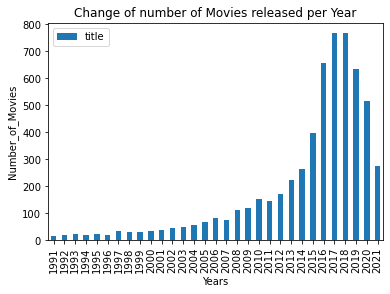

In [84]:
n.plot(kind='bar',x='release_year',y='title')
plt.xlabel('Years')
plt.ylabel('Number_of_Movies')
plt.title('Change of number of Movies released per Year')
plt.show()

#Insight

Here we have calculated the number of movies in recent 20-30 years, so that we can find how the number of movies releasing per year is growing or falling. So, here you can see that till 2017 number of movies releasing per year was increasing rapidly but then it remains like similar for 2018 as well and after that it starts falling rapidly but less as compare to increase

In [85]:
df_1.head()

,title,cast,director,listed_in,country,show_id,type,date_added,release_year,rating,duration_value,duration_format
0,Dick Johnson Is Dead,Samuel West,Kirsten Johnson,Documentaries,United States,s1,Movie,2021-09-25,2020,PG-13,90,min
1,Blood & Water,Ama Qamata,Noam Murro,International TV Shows,South Africa,s2,TV Show,2021-09-24,2021,TV-MA,2,Season
2,Blood & Water,Ama Qamata,Alan Poul,TV Dramas,South Africa,s2,TV Show,2021-09-24,2021,TV-MA,2,Season
3,Blood & Water,Ama Qamata,Rob Seidenglanz,TV Mysteries,South Africa,s2,TV Show,2021-09-24,2021,TV-MA,2,Season
4,Blood & Water,Khosi Ngema,Noam Murro,International TV Shows,South Africa,s2,TV Show,2021-09-24,2021,TV-MA,2,Season


In [86]:
tv_mov = df_1.groupby(['type']).agg({'title':'nunique','listed_in':'nunique','country':'nunique','release_year':['min','max'],'rating':['unique','nunique'],'duration_value':'mean'})

In [87]:
tv_mov

title listed_in country release_year        \
        nunique   nunique nunique          min   max   
type                                                   
Movie      6131        20     121         1942  2021   
TV Show    2676        22      65         1925  2021   

                                                    rating          \
                                                    unique nunique   
type                                                                 
Movie    [PG-13, PG, TV-MA, TV-PG, TV-14, TV-Y, R, TV-G...      14   
TV Show  [TV-MA, TV-14, TV-Y7, TV-PG, TV-Y, TV-G, R, NR...       9   

        duration_value  
                  mean  
type                    
Movie       106.854330  
TV Show       1.928101

#Insight

From the data above we get the comparison between movie and tv shows
1. There are 6131 of movies whereas 2676 of tv shows on netflix
2. Movies are of 20 listed_in types whereas TV shows are of 22 listed_in types
3. Movies are released in 121 various countries whereas TV shows are released in 65 various countries
4. Movies release_year are of range(1942,2021) whereas TV shows release_year are of range(1925,2021)
5. Movies are rated in 14 unique ratings whereas TV show are rated in 9 unique ratings
6. Movies are generally 106.854330 min long whereas TV show are generally 1.928101 means approx 2 seasons long

In [88]:
df_1.groupby(['type']).get_group('TV Show')['date_added'].dt.month.value_counts()

12    5549
7     5232
8     5163
6     5043
9     4901
4     4543
11    4532
3     4352
5     4308
1     4307
10    4295
2     3923
Name: date_added, dtype: int64

In [89]:
df_1.groupby(['type']).get_group('TV Show')['date_added'].dt.day.value_counts()

1     9955
15    4439
30    2288
6     2119
8     2051
31    1856
27    1693
23    1682
16    1671
20    1628
10    1625
14    1620
19    1557
5     1545
4     1540
17    1479
25    1466
22    1410
13    1311
2     1273
18    1262
24    1257
26    1239
7     1169
21    1115
11    1079
28    1042
12    1003
3      951
9      933
29     890
Name: date_added, dtype: int64

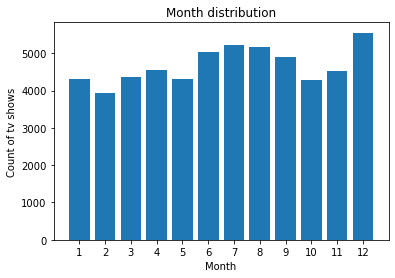

In [90]:
plt.bar(df_1.groupby(['type']).get_group('TV Show')['date_added'].dt.month.value_counts().index,df_1.groupby(['type']).get_group('TV Show')['date_added'].dt.month.value_counts().values)
plt.xticks(np.arange(1,13))
plt.title('Month distribution')
plt.xlabel('Month')
plt.ylabel('Count of tv shows')

plt.show()

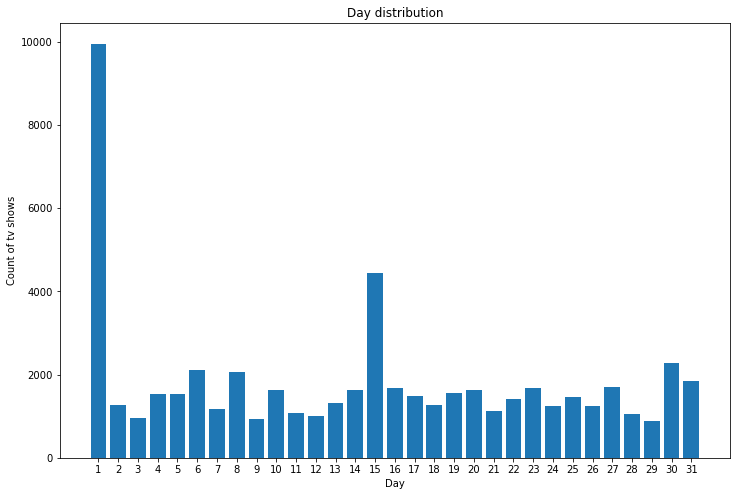

In [91]:
plt.figure(figsize=(12,8))
plt.bar(df_1.groupby(['type']).get_group('TV Show')['date_added'].dt.day.value_counts().index,df_1.groupby(['type']).get_group('TV Show')['date_added'].dt.day.value_counts().values)
plt.xticks(np.arange(1,32))
plt.title('Day distribution')
plt.xlabel('Day')
plt.ylabel('Count of tv shows')
plt.show()

In [92]:
best_month_to_launch_TVshow = df_1.groupby(['type']).get_group('TV Show')['date_added'].dt.month.value_counts().index[0]

In [93]:
best_day_to_launch_TVshow = df_1.groupby(['type']).get_group('TV Show')['date_added'].dt.day.value_counts().index[0]

In [94]:
best_month_to_launch_TVshow

12

In [95]:
best_day_to_launch_TVshow

1

#Insight

best month to launch tv show comes for December as the most tv shows were added on december month of years of establishment of netflix and best day is 1st of month so best time is 1st of December

#Recommendation

To launch new upcoming tv shows on 1st of december on netflix

In [96]:
tv_recent_years = df_1.loc[df_1['type']=='TV Show'].groupby('release_year')[['title']].nunique().reset_index()

In [97]:
tv_recent_years

,release_year,title
0,1925,1
1,1945,1
2,1946,1
3,1963,1
4,1967,1
5,1972,1
6,1974,1
7,1977,1
8,1979,1
9,1981,1


In [98]:
movie_recent_years = df_1.loc[df_1['type']=='Movie'].groupby('release_year')[['title']].nunique().reset_index()

In [99]:
movie_recent_years

,release_year,title
0,1942,2
1,1943,3
2,1944,3
3,1945,3
4,1946,1
...,...,...
68,2017,767
69,2018,767
70,2019,633
71,2020,517


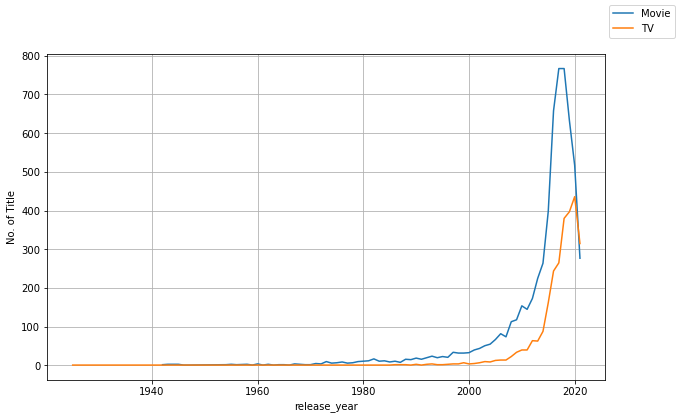

In [102]:
fig = plt.figure(figsize=(10,6))
movie = sb.lineplot(data=movie_recent_years,x='release_year',y='title')
tv = sb.lineplot(data=tv_recent_years,x='release_year',y='title')
plt.ylabel('No. of Title')
fig.legend(labels=['Movie','TV'])
plt.grid()
plt.show()


#Insight

1. Here we have compared the number of movies in recent years to number of tv shows in recent years, so that we can find how the number of movies and tv shows releasing per year is changing. So, here you can see that till 2017 and 2018 number of movies and tv shows releasing per year was increasing rapidly but then  after that it starts falling rapidly but less as compare to increase
2. We can also see that tv shows were released way before movies and netflix contains that tv shows. Range for years for tv shows is [1925,2021] and Range for years for movies is [1942,2021]
3. Number of Movies are high so, this indicates that number of production was more for movies rather than tv shows till 2020, but then for year 2021 the number of production for tv shows was more
4. Netflix peak global content amount was in 2019.

It appears that Netflix has focused more attention
on increasing Movie content that TV Shows. 
Movies have increased much more dramatically
than TV shows

#Recommendation

So, by current trend as per the production of tv shows which was 315 for 2021 as compare to movie which was 277, we recommend that the decision making stakeholders focus on adding more movie on netflix as the addition rate decreased from what was earlier

In [101]:
df_1.head()

,title,cast,director,listed_in,country,show_id,type,date_added,release_year,rating,duration_value,duration_format
0,Dick Johnson Is Dead,Samuel West,Kirsten Johnson,Documentaries,United States,s1,Movie,2021-09-25,2020,PG-13,90,min
1,Blood & Water,Ama Qamata,Noam Murro,International TV Shows,South Africa,s2,TV Show,2021-09-24,2021,TV-MA,2,Season
2,Blood & Water,Ama Qamata,Alan Poul,TV Dramas,South Africa,s2,TV Show,2021-09-24,2021,TV-MA,2,Season
3,Blood & Water,Ama Qamata,Rob Seidenglanz,TV Mysteries,South Africa,s2,TV Show,2021-09-24,2021,TV-MA,2,Season
4,Blood & Water,Khosi Ngema,Noam Murro,International TV Shows,South Africa,s2,TV Show,2021-09-24,2021,TV-MA,2,Season


In [106]:
df_1.groupby(['cast','director'])[['title']].nunique().sort_values(by=['title'],ascending=False)

title
cast               director               
David Attenborough Juliana Vicente     175
Takahiro Sakurai   Noam Murro          110
Anderson Silva     Andy Devonshire      91
Raúl Méndez        Alejandro Lozano     55
Vincent Tong       Thomas Astruc        51
...                                    ...
Hilary Swank       Rob Seidenglanz       1
                   Grant Sputore         1
                   Clint Eastwood        1
                   Christopher Cain      1
Ṣọpẹ́ Dìrísù       Remi Weekes           1

[84259 rows x 1 columns]

#Insight

From here we get to know the cast/director pairs who had been part of titles together how many times. So, here we get the data in descending order means from top to bottom we can know the pairs with max to min number of titles together.

#Recommendation

Can make new projects with pairs having max number of titles together as this shows their synergy and popularity. Audience wants to see them together

In [110]:
country_prop = df_1.groupby(['country'])[['title']].nunique().sort_values(by=['title'],ascending=False).reset_index()
country_prop

,country,title
0,United States,4497
1,India,1263
2,United Kingdom,820
3,Japan,561
4,Canada,445
...,...,...
121,Kazakhstan,1
122,Jamaica,1
123,Slovakia,1
124,Ethiopia,1


C:\Users\HP\AppData\Local\Temp\ipykernel_3716\1107028171.py:71: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(data.index, fontfamily='serif', rotation=45)


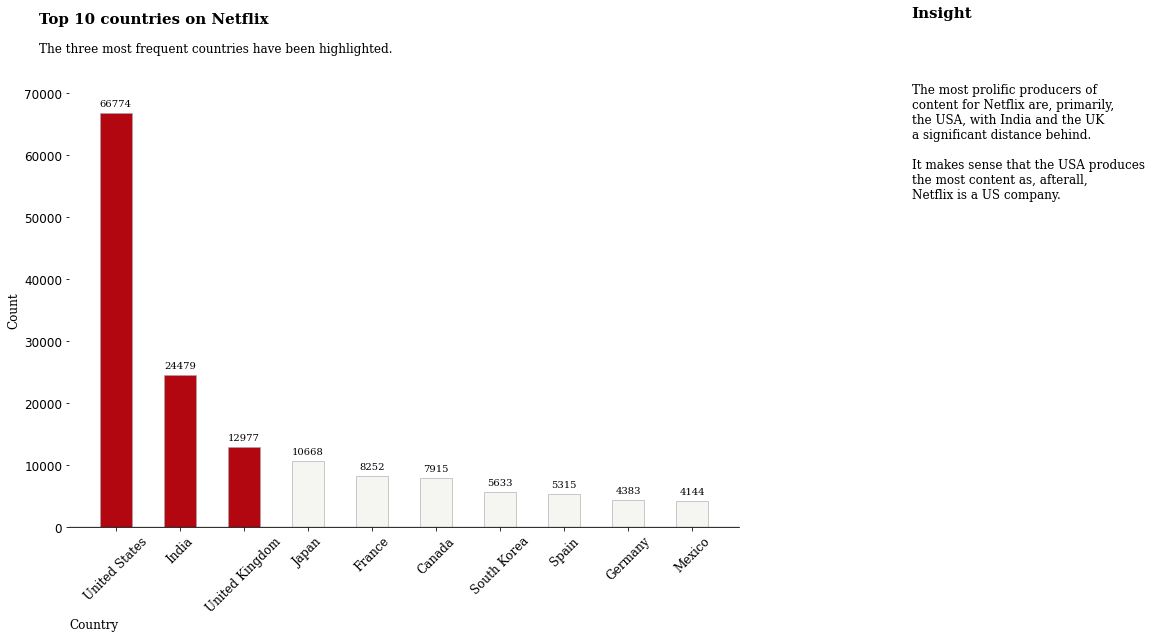

In [134]:
# Quick feature engineering

# Helper column for various plots
df_1['count'] = 1
"""
# Many productions have several countries listed - this will skew our results , we'll grab the first one mentioned

# Lets retrieve just the first country
df['first_country'] = df['country'].apply(lambda x: x.split(",")[0])
df['first_country'].head()

# Rating ages from this notebook: https://www.kaggle.com/andreshg/eda-beginner-to-expert-plotly (thank you!)

ratings_ages = {
    'TV-PG': 'Older Kids',
    'TV-MA': 'Adults',
    'TV-Y7-FV': 'Older Kids',
    'TV-Y7': 'Older Kids',
    'TV-14': 'Teens',
    'R': 'Adults',
    'TV-Y': 'Kids',
    'NR': 'Adults',
    'PG-13': 'Teens',
    'TV-G': 'Kids',
    'PG': 'Older Kids',
    'G': 'Kids',
    'UR': 'Adults',
    'NC-17': 'Adults'
}

df_1['target_ages'] = df_1['rating'].replace(ratings_ages)
df_1['target_ages'].unique()

# Genre

df_1['genre'] = df_1['listed_in'].apply(lambda x :  x.replace(' ,',',').replace(', ',',').split(',')) 

# Reducing name length

df_1['first_country'].replace('United States', 'USA', inplace=True)
df_1['first_country'].replace('United Kingdom', 'UK',inplace=True)
df_1['first_country'].replace('South Korea', 'S. Korea',inplace=True)
"""
data = df_1.groupby('country')['count'].sum().sort_values(ascending=False)[:10]

# Plot

color_map = ['#f5f5f1' for _ in range(10)]
color_map[0] = color_map[1] = color_map[2] =  '#b20710' # color highlight

fig, ax = plt.subplots(1,1, figsize=(12, 8))
ax.bar(data.index, data, width=0.5, 
       edgecolor='darkgray',
       linewidth=0.6,color=color_map)

#annotations
for i in data.index:
    ax.annotate(f"{data[i]}", 
                   xy=(i, data[i] + 1500), #i like to change this to roughly 5% of the highest cat
                   va = 'center', ha='center',fontweight='light', fontfamily='serif')



# Remove border from plot

for s in ['top', 'left', 'right']:
    ax.spines[s].set_visible(False)
    
# Tick labels

ax.set_xticklabels(data.index, fontfamily='serif', rotation=45)

# Title and sub-title

fig.text(0.09, 1, 'Top 10 countries on Netflix', fontsize=15, fontweight='bold', fontfamily='serif')
fig.text(0.09, 0.95, 'The three most frequent countries have been highlighted.', fontsize=12, fontweight='light', fontfamily='serif')

fig.text(1.1, 1.01, 'Insight', fontsize=15, fontweight='bold', fontfamily='serif')

fig.text(1.1, 0.67, '''
The most prolific producers of
content for Netflix are, primarily,
the USA, with India and the UK
a significant distance behind.

It makes sense that the USA produces 
the most content as, afterall, 
Netflix is a US company.
'''
         , fontsize=12, fontweight='light', fontfamily='serif')

#ax.grid(axis='y', linestyle='-', alpha=0.4)   

#grid_y_ticks = np.arange(0, 4000, 500) # y ticks, min, max, then step
#ax.set_yticks(grid_y_ticks)
#ax.set_axisbelow(True)

#Axis labels

plt.xlabel("Country", fontsize=12, fontweight='light', fontfamily='serif',loc='left',y=-1.5)
plt.ylabel("Count", fontsize=12, fontweight='light', fontfamily='serif')
 #plt.legend(loc='upper right')
    
# thicken the bottom line if you want to
plt.axhline(y = 0, color = 'black', linewidth = 1.3, alpha = .7)

ax.tick_params(axis='both', which='major', labelsize=12)


"""import matplotlib.lines as lines
l1 = lines.Line2D([1, 1], [0, 1], transform=fig.transFigure, figure=fig,color='black',lw=0.2)
fig.lines.extend([l1])

ax.tick_params(axis=u'both', which=u'both',length=0)"""

plt.show()


C:\Users\HP\AppData\Local\Temp\ipykernel_3716\551163757.py:17: MatplotlibDeprecationWarning: Support for passing numbers through unit converters is deprecated since 3.5 and support will be removed two minor releases later; use Axis.convert_units instead.
  ax.set_yticks([])


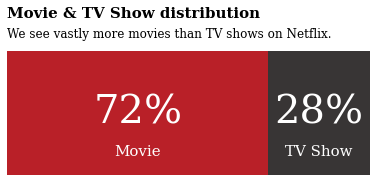

In [120]:
# For viz: Ratio of Movies & TV shows

x=df_1.groupby(['type'])['type'].count()
y=len(df_1)
r=((x/y)).round(2)

mf_ratio = pd.DataFrame(r).T
fig, ax = plt.subplots(1,1,figsize=(6.5, 2.5))

ax.barh(mf_ratio.index, mf_ratio['Movie'], 
        color='#b20710', alpha=0.9, label='Male')
ax.barh(mf_ratio.index, mf_ratio['TV Show'], left=mf_ratio['Movie'], 
        color='#221f1f', alpha=0.9, label='Female')

ax.set_xlim(0, 1)
ax.set_xticks([])
ax.set_yticks([])
#ax.set_yticklabels(mf_ratio.index, fontfamily='serif', fontsize=11)


# movie percentage
for i in mf_ratio.index:
    ax.annotate(f"{int(mf_ratio['Movie'][i]*100)}%", 
                   xy=(mf_ratio['Movie'][i]/2, i),
                   va = 'center', ha='center',fontsize=40, fontweight='light', fontfamily='serif',
                   color='white')

    ax.annotate("Movie", 
                   xy=(mf_ratio['Movie'][i]/2, -0.25),
                   va = 'center', ha='center',fontsize=15, fontweight='light', fontfamily='serif',
                   color='white')
    
    
for i in mf_ratio.index:
    ax.annotate(f"{int(mf_ratio['TV Show'][i]*100)}%", 
                   xy=(mf_ratio['Movie'][i]+mf_ratio['TV Show'][i]/2, i),
                   va = 'center', ha='center',fontsize=40, fontweight='light', fontfamily='serif',
                   color='white')
    ax.annotate("TV Show", 
                   xy=(mf_ratio['Movie'][i]+mf_ratio['TV Show'][i]/2, -0.25),
                   va = 'center', ha='center',fontsize=15, fontweight='light', fontfamily='serif',
                   color='white')






# Title & Subtitle
fig.text(0.125,1.03,'Movie & TV Show distribution', fontfamily='serif',fontsize=15, fontweight='bold')
fig.text(0.125,0.92,'We see vastly more movies than TV shows on Netflix.',fontfamily='serif',fontsize=12)  

for s in ['top', 'left', 'right', 'bottom']:
    ax.spines[s].set_visible(False)
    


#ax.legend(loc='lower center', ncol=3, bbox_to_anchor=(0.5, -0.06))

# Removing legend due to labelled plot
ax.legend().set_visible(False)
plt.show()

#Insight

From the chart we get to know that about the proportion of movies by tv show on netflix, in which movie is clearly dominating with around 72% of title belongs to it and rest for tv show

C:\Users\HP\AppData\Local\Temp\ipykernel_3716\1703422302.py:20: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(data_q2q3_ratio.index, fontfamily='serif', fontsize=11)


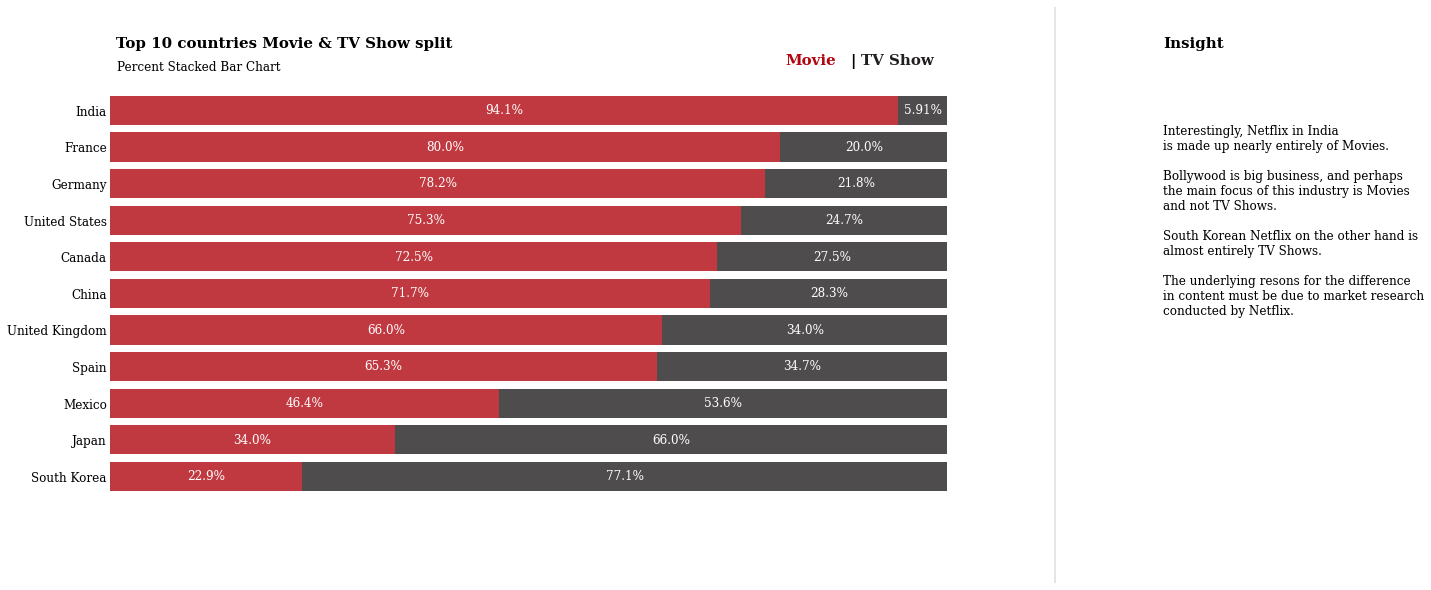

In [127]:
country_order = df_1['country'].value_counts()[:11].index
data_q2q3 = df_1[['type', 'country']].groupby('country')['type'].value_counts().unstack().loc[country_order]
data_q2q3['sum'] = data_q2q3.sum(axis=1)
data_q2q3_ratio = (data_q2q3.T / data_q2q3['sum']).T[['Movie', 'TV Show']].sort_values(by='Movie',ascending=False)[::-1]




###
fig, ax = plt.subplots(1,1,figsize=(15, 8),)

ax.barh(data_q2q3_ratio.index, data_q2q3_ratio['Movie'], 
        color='#b20710', alpha=0.8, label='Movie')
ax.barh(data_q2q3_ratio.index, data_q2q3_ratio['TV Show'], left=data_q2q3_ratio['Movie'], 
        color='#221f1f', alpha=0.8, label='TV Show')


ax.set_xlim(0, 1)
ax.set_xticks([])
ax.set_yticklabels(data_q2q3_ratio.index, fontfamily='serif', fontsize=11)

# male percentage
for i in data_q2q3_ratio.index:
    ax.annotate(f"{data_q2q3_ratio['Movie'][i]*100:.3}%", 
                   xy=(data_q2q3_ratio['Movie'][i]/2, i),
                   va = 'center', ha='center',fontsize=12, fontweight='light', fontfamily='serif',
                   color='white')

for i in data_q2q3_ratio.index:
    ax.annotate(f"{data_q2q3_ratio['TV Show'][i]*100:.3}%", 
                   xy=(data_q2q3_ratio['Movie'][i]+data_q2q3_ratio['TV Show'][i]/2, i),
                   va = 'center', ha='center',fontsize=12, fontweight='light', fontfamily='serif',
                   color='white')
    

fig.text(0.13, 0.93, 'Top 10 countries Movie & TV Show split', fontsize=15, fontweight='bold', fontfamily='serif')   
fig.text(0.131, 0.89, 'Percent Stacked Bar Chart', fontsize=12,fontfamily='serif')   

for s in ['top', 'left', 'right', 'bottom']:
    ax.spines[s].set_visible(False)
    
#ax.legend(loc='lower center', ncol=3, bbox_to_anchor=(0.5, -0.06))

fig.text(0.75,0.9,"Movie", fontweight="bold", fontfamily='serif', fontsize=15, color='#b20710')
fig.text(0.81,0.9,"|", fontweight="bold", fontfamily='serif', fontsize=15, color='black')
fig.text(0.82,0.9,"TV Show", fontweight="bold", fontfamily='serif', fontsize=15, color='#221f1f')


fig.text(1.1, 0.93, 'Insight', fontsize=15, fontweight='bold', fontfamily='serif')

fig.text(1.1, 0.44, '''
Interestingly, Netflix in India
is made up nearly entirely of Movies. 

Bollywood is big business, and perhaps
the main focus of this industry is Movies
and not TV Shows.

South Korean Netflix on the other hand is 
almost entirely TV Shows.

The underlying resons for the difference 
in content must be due to market research
conducted by Netflix.
'''
         , fontsize=12, fontweight='light', fontfamily='serif')



import matplotlib.lines as lines
l1 = lines.Line2D([1, 1], [0, 1], transform=fig.transFigure, figure=fig,color='black',lw=0.2)
fig.lines.extend([l1])




ax.tick_params(axis='both', which='major', labelsize=12)
ax.tick_params(axis=u'both', which=u'both',length=0)

plt.show()

C:\Users\HP\AppData\Local\Temp\ipykernel_3716\1618377016.py:32: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(mf.columns, fontfamily='serif')


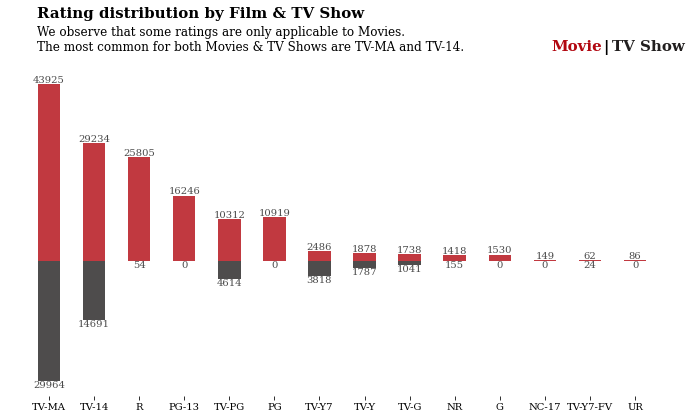

In [137]:
order = pd.DataFrame(df_1.groupby('rating')['count'].sum().sort_values(ascending=False).reset_index())
rating_order = list(order['rating'])
mf = df_1.groupby('type')['rating'].value_counts().unstack().sort_index().fillna(0).astype(int)[rating_order]

movie = mf.loc['Movie']
tv = - mf.loc['TV Show']


fig, ax = plt.subplots(1,1, figsize=(12, 6))
ax.bar(movie.index, movie, width=0.5, color='#b20710', alpha=0.8, label='Movie')
ax.bar(tv.index, tv, width=0.5, color='#221f1f', alpha=0.8, label='TV Show')
#ax.set_ylim(-35, 50)

# Annotations
for i in tv.index:
    ax.annotate(f"{-tv[i]}", 
                   xy=(i, tv[i] - 1000),
                   va = 'center', ha='center',fontweight='light', fontfamily='serif',
                   color='#4a4a4a')   

for i in movie.index:
    ax.annotate(f"{movie[i]}", 
                   xy=(i, movie[i] + 1000),
                   va = 'center', ha='center',fontweight='light', fontfamily='serif',
                   color='#4a4a4a')
    
 

for s in ['top', 'left', 'right', 'bottom']:
    ax.spines[s].set_visible(False)

ax.set_xticklabels(mf.columns, fontfamily='serif')
ax.set_yticks([])    

ax.legend().set_visible(False)
fig.text(0.16, 1, 'Rating distribution by Film & TV Show', fontsize=15, fontweight='bold', fontfamily='serif')
fig.text(0.16, 0.89, 
'''We observe that some ratings are only applicable to Movies. 
The most common for both Movies & TV Shows are TV-MA and TV-14.
'''

, fontsize=12, fontweight='light', fontfamily='serif')


fig.text(0.755,0.924,"Movie", fontweight="bold", fontfamily='serif', fontsize=15, color='#b20710')
fig.text(0.815,0.924,"|", fontweight="bold", fontfamily='serif', fontsize=15, color='black')
fig.text(0.825,0.924,"TV Show", fontweight="bold", fontfamily='serif', fontsize=15, color='#221f1f')

plt.show()

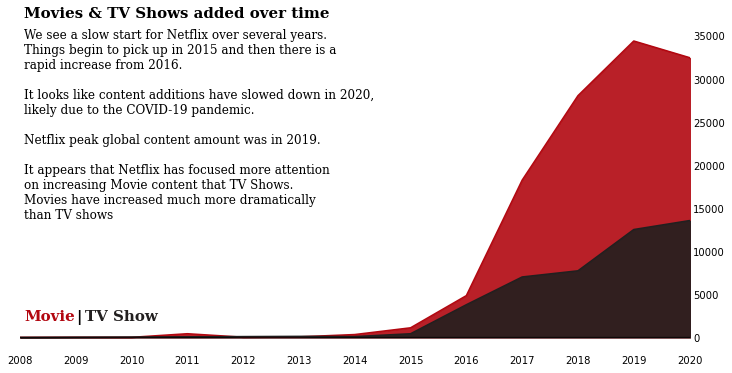

In [150]:
df_1['year_added'] = df_1['date_added'].dt.year

fig, ax = plt.subplots(1, 1, figsize=(12, 6))
color = ["#b20710", "#221f1f"]

for i, mtv in enumerate(df_1['type'].value_counts().index):
    mtv_rel = df_1[df_1['type']==mtv]['year_added'].value_counts().sort_index()
    ax.plot(mtv_rel.index, mtv_rel, color=color[i], label=mtv)
    ax.fill_between(mtv_rel.index, 0, mtv_rel, color=color[i], alpha=0.9)
    
ax.yaxis.tick_right()
    
ax.axhline(y = 0, color = 'black', linewidth = 1.3, alpha = .7)

#ax.set_ylim(0, 50)
#ax.legend(loc='upper left')
for s in ['top', 'right','bottom','left']:
    ax.spines[s].set_visible(False)

ax.grid(False)

ax.set_xlim(2008,2020)
plt.xticks(np.arange(2008, 2021, 1))

fig.text(0.13, 0.90, 'Movies & TV Shows added over time', fontsize=15, fontweight='bold', fontfamily='serif')
fig.text(0.13, 0.40, 
'''We see a slow start for Netflix over several years. 
Things begin to pick up in 2015 and then there is a 
rapid increase from 2016.

It looks like content additions have slowed down in 2020, 
likely due to the COVID-19 pandemic.

Netflix peak global content amount was in 2019.

It appears that Netflix has focused more attention
on increasing Movie content that TV Shows. 
Movies have increased much more dramatically
than TV shows
'''

, fontsize=12, fontweight='light', fontfamily='serif')


fig.text(0.13,0.2,"Movie", fontweight="bold", fontfamily='serif', fontsize=15, color='#b20710')
fig.text(0.19,0.2,"|", fontweight="bold", fontfamily='serif', fontsize=15, color='black')
fig.text(0.2,0.2,"TV Show", fontweight="bold", fontfamily='serif', fontsize=15, color='#221f1f')

ax.tick_params(axis=u'both', which=u'both',length=0)

plt.show()

C:\Users\HP\AppData\Local\Temp\ipykernel_3716\3200626169.py:12: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  loli = df_loli.groupby('country')['release_year','year_added'].mean().round()


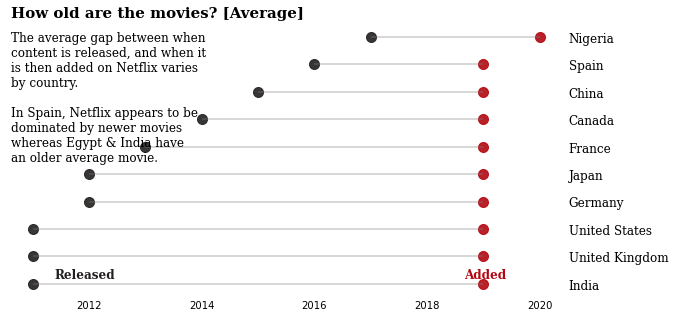

In [157]:
# Data

df_movies
df_tv

### Relevant groupings

data = df_movies.groupby('country')[['country','count']].sum().sort_values(by='count',ascending=False).reset_index()[:10]
data = data['country']
df_loli = df_movies.loc[df_movies['country'].isin(data)]

loli = df_loli.groupby('country')['release_year','year_added'].mean().round()


# Reorder it following the values of the first value
ordered_df = loli.sort_values(by='release_year')

ordered_df_rev = loli.sort_values(by='release_year',ascending=False)

my_range=range(1,len(loli.index)+1)


fig, ax = plt.subplots(1, 1, figsize=(10, 5))

fig.text(0.13, 0.9, 'How old are the movies? [Average]', fontsize=15, fontweight='bold', fontfamily='serif')
plt.hlines(y=my_range, xmin=ordered_df['release_year'], xmax=ordered_df['year_added'], color='grey', alpha=0.4)
plt.scatter(ordered_df['release_year'], my_range, color='#221f1f',s=100, alpha=0.9, label='Average release date')
plt.scatter(ordered_df['year_added'], my_range, color='#b20710',s=100, alpha=0.9 , label='Average added date')
#plt.legend()

for s in ['top', 'left', 'right', 'bottom']:
    ax.spines[s].set_visible(False)
    

# Removes the tick marks but keeps the labels
ax.tick_params(axis=u'both', which=u'both',length=0)
# Move Y axis to the right side
ax.yaxis.tick_right()

plt.yticks(my_range, ordered_df.index)
plt.yticks(fontname = "serif",fontsize=12)

# Custome legend
fig.text(0.19,0.175,"Released", fontweight="bold", fontfamily='serif', fontsize=12, color='#221f1f')
fig.text(0.76,0.175,"Added", fontweight="bold", fontfamily='serif', fontsize=12, color='#b20710')


fig.text(0.13, 0.46, 
'''The average gap between when 
content is released, and when it
is then added on Netflix varies
by country. 

In Spain, Netflix appears to be 
dominated by newer movies 
whereas Egypt & India have
an older average movie.
'''

, fontsize=12, fontweight='light', fontfamily='serif')


#plt.xlabel('Year')
#plt.ylabel('Country')
plt.show()

C:\Users\HP\AppData\Local\Temp\ipykernel_3716\1926856082.py:5: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  loli = df_loli.groupby('country')['release_year','year_added'].mean().round()


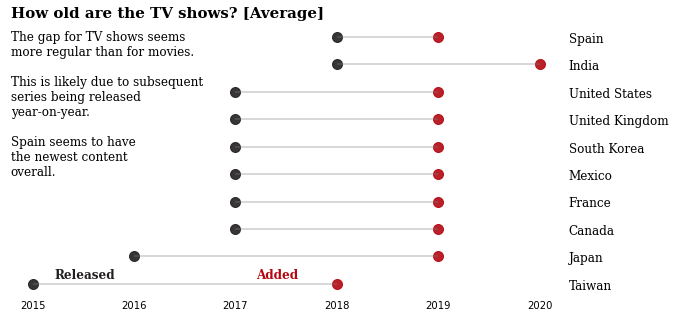

In [158]:
data = df_tv.groupby('country')[['country','count']].sum().sort_values(by='count',ascending=False).reset_index()[:10]
data = data['country']
df_loli = df_tv.loc[df_tv['country'].isin(data)]

loli = df_loli.groupby('country')['release_year','year_added'].mean().round()


# Reorder it following the values of the first value:
ordered_df = loli.sort_values(by='release_year')

ordered_df_rev = loli.sort_values(by='release_year',ascending=False)

my_range=range(1,len(loli.index)+1)


fig, ax = plt.subplots(1, 1, figsize=(10, 5))

fig.text(0.13, 0.9, 'How old are the TV shows? [Average]', fontsize=15, fontweight='bold', fontfamily='serif')
plt.hlines(y=my_range, xmin=ordered_df['release_year'], xmax=ordered_df['year_added'], color='grey', alpha=0.4)
plt.scatter(ordered_df['release_year'], my_range, color='#221f1f',s=100, alpha=0.9, label='Average release date')
plt.scatter(ordered_df['year_added'], my_range, color='#b20710',s=100, alpha=0.9 , label='Average added date')
#plt.legend()

for s in ['top', 'left', 'right', 'bottom']:
    ax.spines[s].set_visible(False)
    
ax.yaxis.tick_right()
plt.yticks(my_range, ordered_df.index)
plt.yticks(fontname = "serif",fontsize=12)


fig.text(0.19,0.175,"Released", fontweight="bold", fontfamily='serif', fontsize=12, color='#221f1f')

fig.text(0.47,0.175,"Added", fontweight="bold", fontfamily='serif', fontsize=12, color='#b20710')


fig.text(0.13, 0.42, 
'''The gap for TV shows seems
more regular than for movies.

This is likely due to subsequent
series being released
year-on-year.

Spain seems to have
the newest content
overall.
'''

, fontsize=12, fontweight='light', fontfamily='serif')


ax.tick_params(axis=u'both', which=u'both',length=0)
#plt.xlabel('Value of the variables')
#plt.ylabel('Group')
plt.show()